In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("complaints.csv")

In [3]:
df.head(3)

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2019-09-24,Debt collection,I do not know,Attempts to collect debt not owed,Debt is not yours,transworld systems inc. \nis trying to collect...,NaN,TRANSWORLD SYSTEMS INC,FL,335XX,NaN,Consent provided,Web,2019-09-24,Closed with explanation,Yes,NaN,3384392
1,2019-09-19,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,Company has responded to the consumer and the ...,Experian Information Solutions Inc.,PA,15206,NaN,Consent not provided,Web,2019-09-20,Closed with non-monetary relief,Yes,NaN,3379500
2,2019-10-25,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,I would like to request the suppression of the...,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",CA,937XX,NaN,Consent provided,Web,2019-10-25,Closed with explanation,Yes,NaN,3417821


In [4]:
df.Issue.unique()

array(['Attempts to collect debt not owed',
       'Incorrect information on your report', 'Communication tactics',
       "Problem with a credit reporting company's investigation into an existing problem",
       'Closing your account', 'Fraud or scam',
       'Problems at the end of the loan or lease',
       'Problem with fraud alerts or security freezes',
       'Closing on a mortgage', 'Improper use of your report',
       'Trouble during payment process',
       'Written notification about debt',
       'Dealing with your lender or servicer',
       'Took or threatened to take negative or legal action',
       'Managing an account', 'False statements or representation',
       'Unable to get your credit report or credit score',
       'Struggling to pay mortgage', 'Other features, terms, or problems',
       'Problem with a purchase shown on your statement',
       'Applying for a mortgage or refinancing an existing mortgage',
       'Fees or interest', 'Closing an account',
    

In [ ]:
ax = df['Product'].value_counts().nlargest(10).plot(kind='bar',
                                    figsize=(14,8),
                                    title="Frequency for each Product")
ax.set_xlabel("Product Names")
ax.set_ylabel("Frequency")
#plt.show()

Text(0, 0.5, 'Frequency')

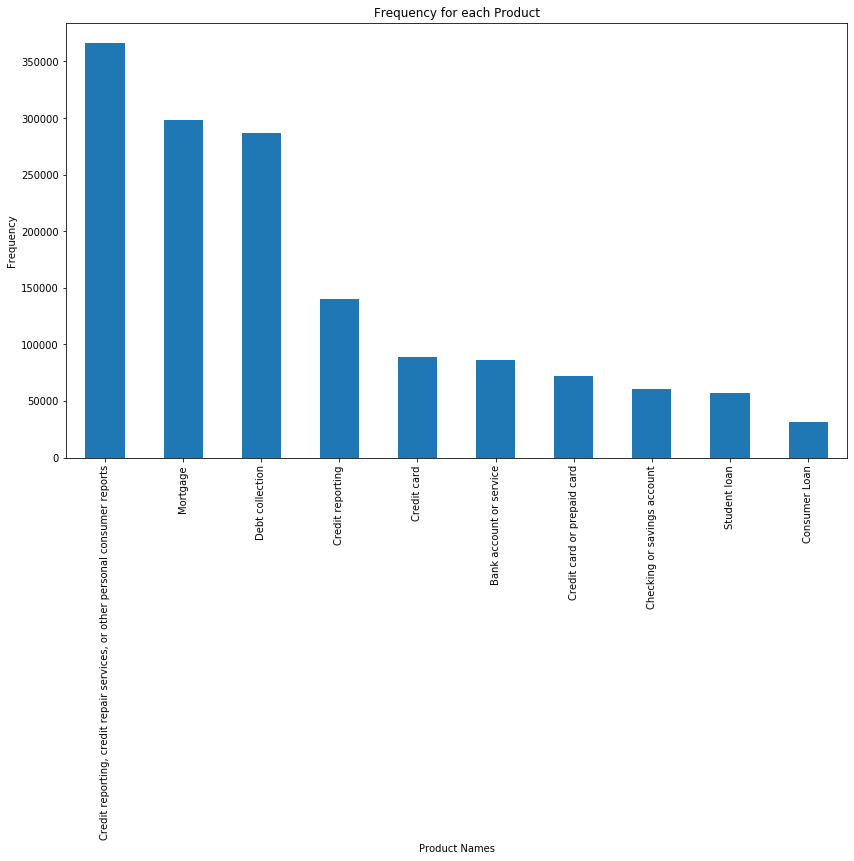

In [12]:
ax = df['Product'].value_counts().nlargest(10).plot(kind='bar',
                                    figsize=(14,8),
                                    title="Frequency for each Product")
ax.set_xlabel("Product Names")
ax.set_ylabel("Frequency")
#plt.show()

In [6]:
#ax2 = df['Sub-product'].value_counts().nlargest(10).plot(kind='bar',
#                                    figsize=(14,8),
#                                    title="Frequency for each Sub-Product")
#ax2.set_xlabel("Sub-Product Names")
#ax2.set_ylabel("Frequency")

Text(0, 0.5, 'Frequency')

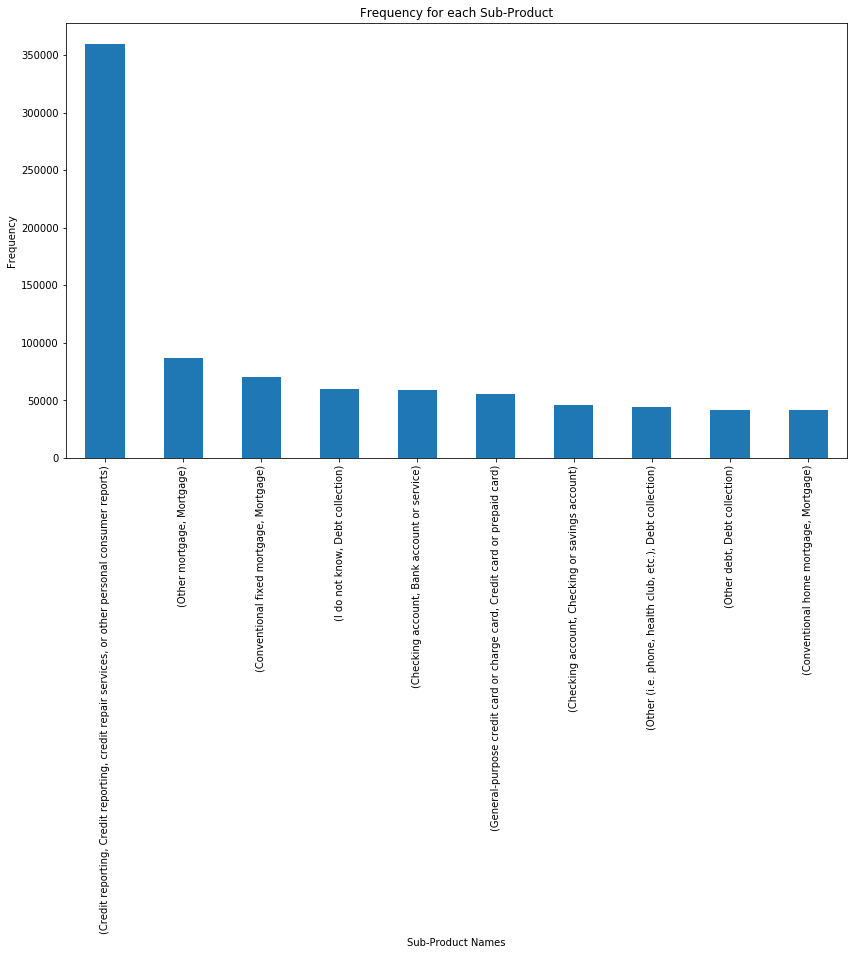

In [7]:
s_sp = df['Product'].groupby(df['Sub-product']).value_counts()

ax21 = s_sp.nlargest(10).plot(kind='bar',
                                    figsize=(14,8),
                                    title="Frequency for each Sub-Product")
ax21.set_xlabel("Sub-Product Names")
ax21.set_ylabel("Frequency")

In [8]:
#ax3 = df['Issue'].value_counts().nlargest(10).plot(kind='bar',
#                                    figsize=(14,8),
#                                    title="Frequency for each Issue")
#ax3.set_xlabel("Issue Names")
#ax3.set_ylabel("Frequency")

Text(0, 0.5, 'Frequency')

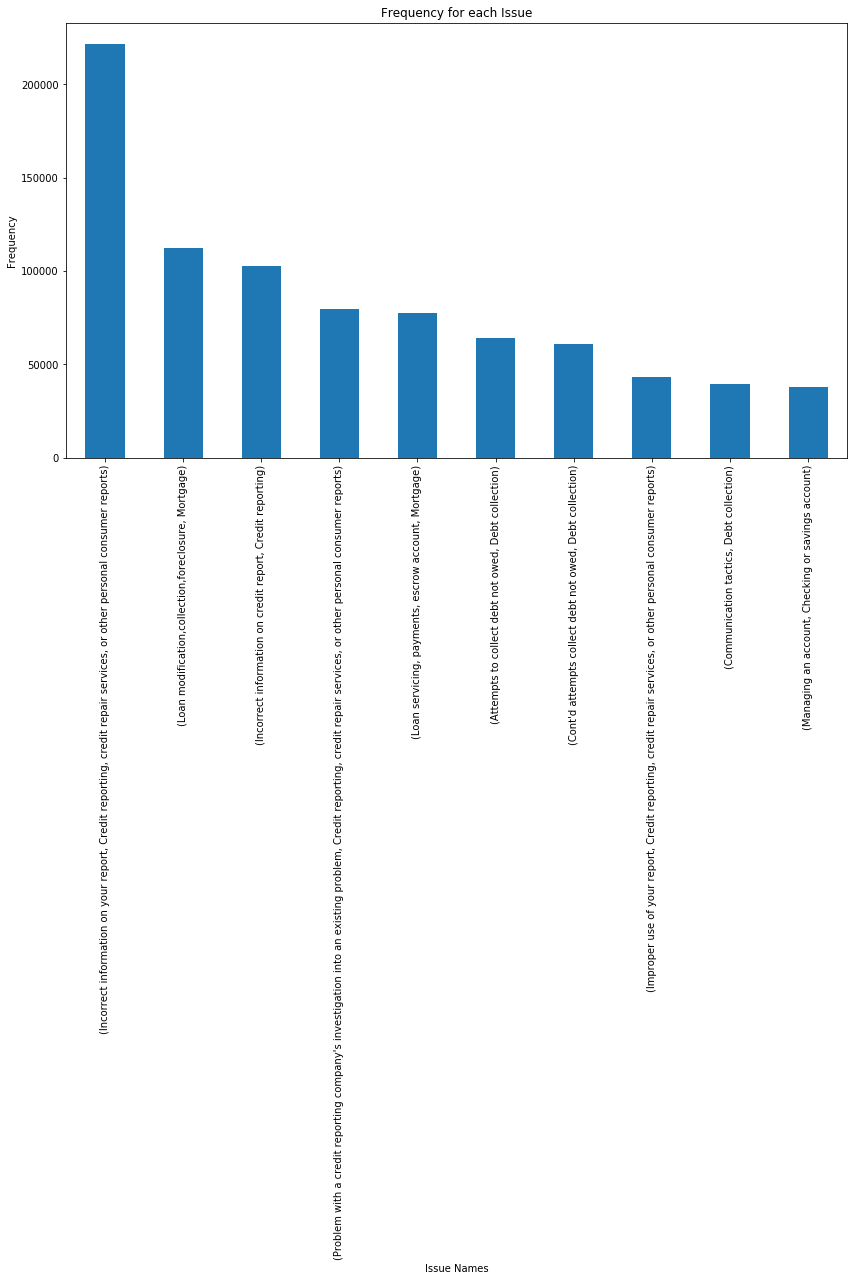

In [9]:
s_i = df['Product'].groupby(df['Issue']).value_counts()

ax31 = s_i.nlargest(10).plot(kind='bar',
                                    figsize=(14,8),
                                    title="Frequency for each Issue")
ax31.set_xlabel("Issue Names")
ax31.set_ylabel("Frequency")

In [10]:
#ax4 = df['Sub-issue'].value_counts().nlargest(10).plot(kind='bar',
#                                    figsize=(14,8),
#                                    title="Frequency for each Sub-issue")
#ax4.set_xlabel("Sub-issue Names")
#ax4.set_ylabel("Frequency")

Text(0, 0.5, 'Frequency')

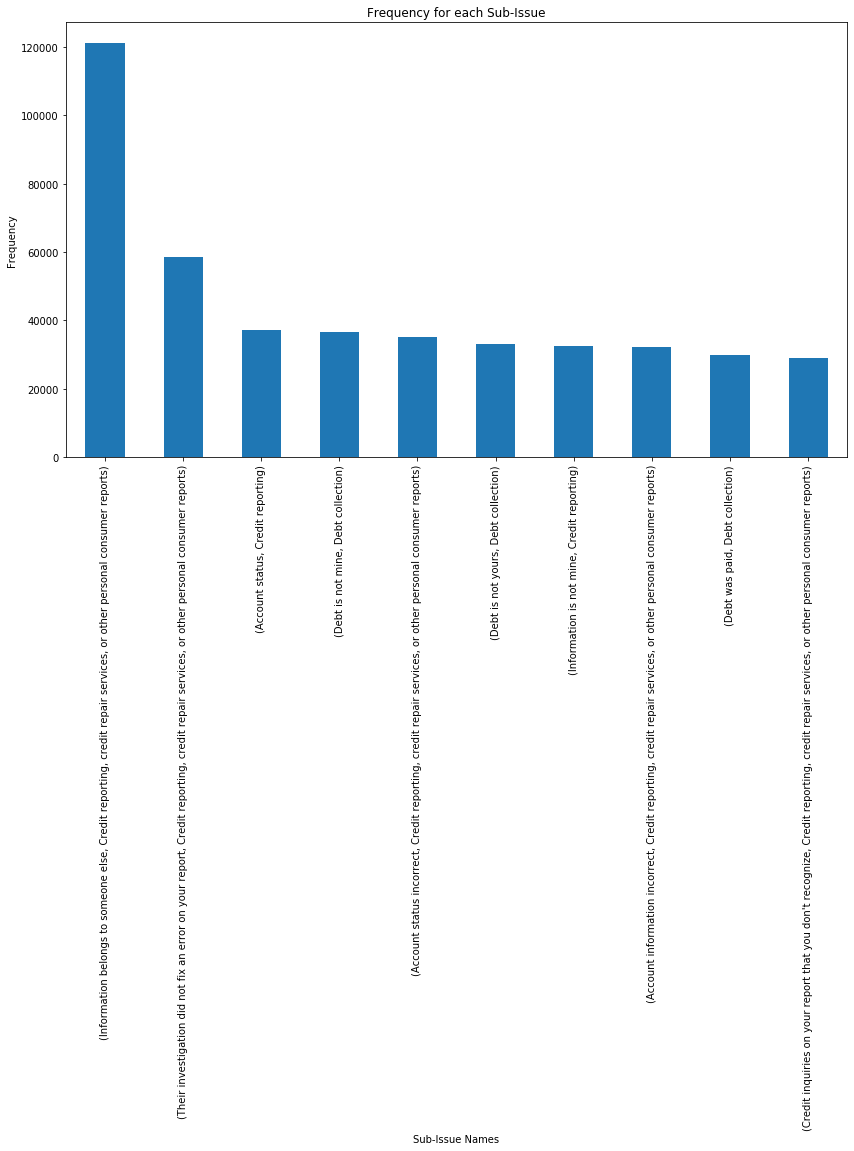

In [11]:
s_si = df['Product'].groupby(df['Sub-issue']).value_counts()

ax41 = s_si.nlargest(10).plot(kind='bar',
                                    figsize=(14,8),
                                    title="Frequency for each Sub-Issue")
ax41.set_xlabel("Sub-Issue Names")
ax41.set_ylabel("Frequency")

## Not Mine

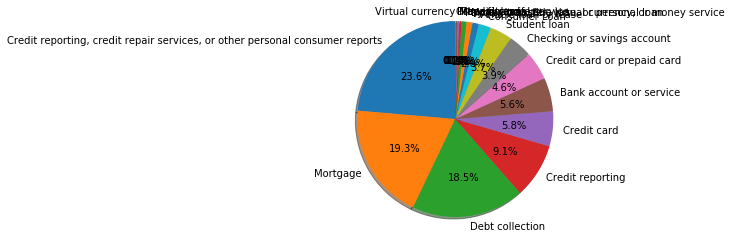

In [21]:
p_product_discussions = round(df["Product"].value_counts() / len(df["Product"]) * 100,2)
labels = list(p_product_discussions.index)
values = p_product_discussions.values.tolist()
colors = ['#F78181', '#F5A9BC', '#2E9AFE', '#58FA58', '#FAAC58', '#088A85', '#8A0808', '#848484', '#F781F3', '#D7DF01', '#2E2EFE']

import matplotlib.pyplot as plt

fig1, ax1 = plt.subplots()
ax1.pie(values, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [23]:
disputed = df['Consumer disputed?'].value_counts()
company_response = df['Company response to consumer'].value_counts()
top5_disputed = df['Company'].loc[df['Consumer disputed?'] == 'Yes'].value_counts()[:5]
top5_nodispute = df['Company'].loc[df['Consumer disputed?'] == 'No'].value_counts()[:5]
df['Date received'] = pd.to_datetime(df['Date received'])
df['year_received'], df['month_received'] = df['Date received'].dt.year, df['Date received'].dt.month


In [48]:
sorting_groups = df.groupby(['year_received', 'Consumer disputed?'])['Company'].apply(lambda x: x.value_counts())
d = {'CRM': sorting_groups}


year_crm = pd.DataFrame(data=d).reset_index()
year_crm.sort_values(by='CRM', ascending=False)

crm_df = year_crm.rename(columns={"level_2": "company"})

boa_disputes = crm_df.loc[(crm_df['company'] == 'BANK OF AMERICA, NATIONAL ASSOCIATION') & (crm_df['Consumer disputed?'] == 'Yes')]
wfc_disputes = crm_df.loc[(crm_df['company'] == 'WELLS FARGO & COMPANY') & (crm_df['Consumer disputed?'] == 'Yes')]
jp_disputes = crm_df.loc[(crm_df['company'] == 'JPMORGAN CHASE & CO.') & (crm_df['Consumer disputed?'] == 'Yes')]
equi_disputes = crm_df.loc[(crm_df['company'] == 'EQUIFAX') & (crm_df['Consumer disputed?'] == 'Yes')]
citi_disputes = crm_df.loc[(crm_df['company'] == 'CITIBANK, N.A.') & (crm_df['Consumer disputed?'] == 'Yes')]

# Establish the year (Continue Here tomorrow!)
years = boa_disputes['year_received'].values.tolist()
#
boa_disputes_amount = boa_disputes['CRM'].values.tolist()
wfc_disputes_amount = wfc_disputes['CRM'].values.tolist()
jp_disputes_amount = jp_disputes['CRM'].values.tolist()
equi_disputes_amount = equi_disputes['CRM'].values.tolist()
citi_disputes_amount = citi_disputes['CRM'].values.tolist()

boa_text = [str(dis) + '\n Disputes'  for dis in boa_disputes_amount]
wfc_text = [str(wfc) + '\n Disputes'  for wfc in wfc_disputes_amount]
jp_text = [str(jp) + '\n Disputes' for jp in jp_disputes_amount]
equi_text = [str(equi) + '\n Disputes' for equi in equi_disputes_amount]
citi_text = [str(citi) + '\n Disputes' for citi in citi_disputes_amount]


ValueError: x and y must be the same size

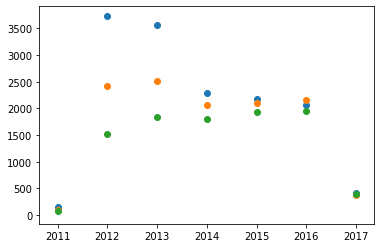

In [54]:
boa_disputes_chart = plt.scatter(
    x=years,
    y=boa_disputes_amount)

wfc_disputes_chart = plt.scatter(
    x=years,
    y=wfc_disputes_amount)

jp_disputes_chart = plt.scatter(
    x=years,
    y=jp_disputes_amount)

equi_disputes_chart = plt.scatter(
    x=years,
    y=equi_disputes_amount)

citi_disputes_chart = plt.scatter(
    x=years,
    y=citi_disputes_amount)

data = [boa_disputes_chart, wfc_disputes_chart, jp_disputes_chart, equi_disputes_chart, citi_disputes_chart]

layout = dict(title = 'Number of Disputes <br> (Top 5 Companies)',
              xaxis = dict(title = 'Year'),
              yaxis = dict(title = 'Number of Disputes')
             )


fig = dict(data=data, layout=layout, legend = True)


In [14]:
df.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2019-09-24,Debt collection,I do not know,Attempts to collect debt not owed,Debt is not yours,transworld systems inc. \nis trying to collect...,NaN,TRANSWORLD SYSTEMS INC,FL,335XX,NaN,Consent provided,Web,2019-09-24,Closed with explanation,Yes,NaN,3384392
1,2019-09-19,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,Company has responded to the consumer and the ...,Experian Information Solutions Inc.,PA,15206,NaN,Consent not provided,Web,2019-09-20,Closed with non-monetary relief,Yes,NaN,3379500
2,2019-10-25,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,I would like to request the suppression of the...,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",CA,937XX,NaN,Consent provided,Web,2019-10-25,Closed with explanation,Yes,NaN,3417821
3,2019-11-08,Debt collection,I do not know,Communication tactics,Frequent or repeated calls,"Over the past 2 weeks, I have been receiving e...",NaN,"Diversified Consultants, Inc.",NC,275XX,NaN,Consent provided,Web,2019-11-08,Closed with explanation,Yes,NaN,3433198
4,2019-02-08,Vehicle loan or lease,Lease,Problem with a credit reporting company's inve...,Their investigation did not fix an error on yo...,NaN,NaN,HYUNDAI CAPITAL AMERICA,FL,33161,NaN,Consent not provided,Web,2019-02-08,Closed with non-monetary relief,Yes,NaN,3146310
